### Oregon 2013 Monthly Count by Metro Area Figures

Revising figures in a Jupyter Notebook. Jeff would like the exposure series too. I think this would be helpful. 

In [2]:
# load tidyverse library
library(tidyverse)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.4     
✔ tibble  1.4.2          ✔ dplyr   0.7.4     
✔ tidyr   0.8.0          ✔ stringr 1.3.0     
✔ readr   1.1.1          ✔ forcats 0.3.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::vars()    masks ggplot2::vars()

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



#### ZIP code time-series for each MSA

I need to find the ZIP codes in each MSA to add a time-series plot on MSA. I think the easiest way to find the ZIP codes in each MSA is to find the unique ZIP codes. I'm going to start by importing the SABA case-crossover data frame and finding the ZIP codes in each MSA.

In [3]:
# read saba
path = paste0('../../data/health/or_respiratory_may_to_sep_time_strat_casecross_er.csv')

# read respiratory casecross and find unique zipcodes by MSA values
zip = read_csv(path, col_types = cols(.default = "c")) %>% 
    select(ZIPCODE, MSA) 

Reducing to only unique ZIP and MSA combos.

In [4]:
# unique zip/msa combo
zip_msa = unique(zip)
# check number of zipcodes
nrow(zip_msa)

[1] 377

Importing the population-weighted zipcode estimates of PM<sub>2.5</sub> and assigning MSA to the ZIP code estimate. I'm then going to join to MSA values and limit to exclude ZIP codes not in an MSA.

In [5]:
# read zip pm; join with msa
msa_pm = read_csv('../../data//pm/2013-oregon_zip_pm25.csv', 
                  col_types = cols(ZIPCODE = 'c')) %>% 
    # join with unique MSA vector
    left_join(zip_msa, by = 'ZIPCODE') %>%
    # mutate
    mutate(ZIPCODE = as.factor(ZIPCODE),
        MSA = as.factor(MSA),
        # assign metro name to number
        metroarea = case_when(MSA == 13460 ~ "Bend",
                              MSA == 18700 ~ "Corvallis",
                              MSA == 21660 ~ "Eugene",
                              MSA == 32780 ~ "Medford",
                              MSA == 38900 ~ "Portland",
                              MSA == 41420 ~ "Salem"))  %>% 
    # filter to zips in an MSA only
    filter(!is.na(metroarea)) #%>% 
    # filter to july-sept
    #filter(date >= '2013-07-01' & date <= '2013-09-30')

Checking summary of MSA ZIP population-weighted PM<sub>2.5</sub> values.

In [6]:
# checking pm values in MSA
summary(msa_pm)

    ZIPCODE           date               wrf_f_pm         wrf_nf_pm      
 97002  :  153   Min.   :2013-05-01   Min.   : 0.1294   Min.   : 0.1139  
 97004  :  153   1st Qu.:2013-06-08   1st Qu.: 6.8926   1st Qu.: 6.0226  
 97005  :  153   Median :2013-07-16   Median :12.7306   Median :11.7260  
 97006  :  153   Mean   :2013-07-16   Mean   :14.6881   Mean   :13.6106  
 97007  :  153   3rd Qu.:2013-08-23   3rd Qu.:20.2586   3rd Qu.:19.0668  
 97008  :  153   Max.   :2013-09-30   Max.   :96.6989   Max.   :56.5810  
 (Other):26775                                                           
   wrf_smk_pm         geo_wt_pm          krig_pm        background_pm  
 Min.   : 0.00000   Min.   : -8.528   Min.   :-13.991   Min.   :2.768  
 1st Qu.: 0.00206   1st Qu.:  3.658   1st Qu.:  2.976   1st Qu.:4.066  
 Median : 0.16681   Median :  4.803   Median :  4.058   Median :4.740  
 Mean   : 1.24641   Mean   :  5.538   Mean   :  4.982   Mean   :4.736  
 3rd Qu.: 1.12928   3rd Qu.:  6.254   3rd Qu.:  

Plot of ZIP PM<sub>2.5</sub> by MSA.

In [35]:
# plot of pm by msa
pm_msa_plot = ggplot(data = msa_pm, aes(x = date, y = geo_smk_pm, group = ZIPCODE)) +
    geom_line(color = '#e94057') +
    # facet by metro area
    facet_wrap(~metroarea, ncol = 1) +
    # y label
    ylab(expression(paste("Wildfire Smoke PM"[2.5]," 10µg/m"^3))) +
    # x label
    xlab("Date") +
    ggtitle('A.') +
    theme(panel.background = element_rect(fill = 'white', colour = 'black'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        # strip element
        strip.background = element_rect(colour=NA, fill=NA),
        panel.border = element_rect(fill = NA, color = "black"),
        # facet text size
        strip.text = element_text(size = 10),
        axis.title.y = element_text(angle = 90))

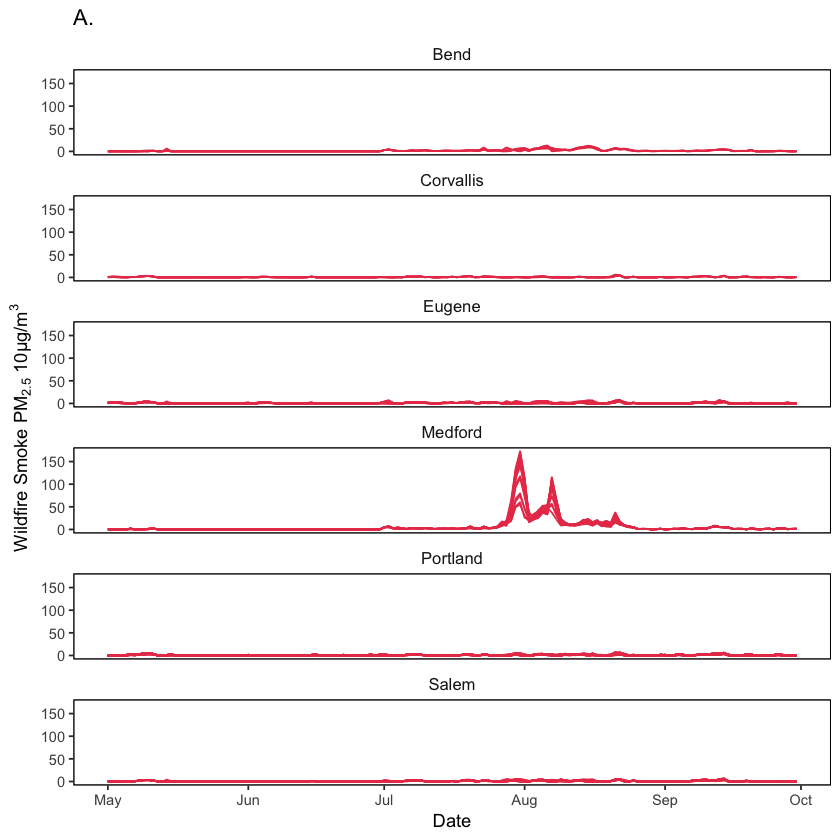

In [36]:
pm_msa_plot

Importing SABA and ED counts/rates by MSA.

In [8]:
# read saba and asthma ed count
saba_count <- read_csv("../../data/health/saba_month_counts.csv") %>% 
    filter(month %in% 5:9) %>% 
    mutate(month_name = factor(month_name, levels = c('May', 'Jun','Jul', 'Aug', 'Sep')))
# read ed count
ed_count <- read_csv("../../data/health/asthma_er_month_counts.csv") %>% 
    filter(month %in% 5:9) %>% 
    mutate(month_name = factor(month_name, levels = c('May', 'Jun','Jul', 'Aug', 'Sep')))

Parsed with column specification:
cols(
  MSA = col_integer(),
  month = col_integer(),
  n_saba = col_integer(),
  NAME = col_character(),
  POPESTIMATE2013 = col_integer(),
  rate = col_double(),
  rate_per1000 = col_double(),
  msa_name = col_character(),
  month_name = col_character()
)
Parsed with column specification:
cols(
  MSA = col_integer(),
  month = col_integer(),
  n_ed = col_integer(),
  NAME = col_character(),
  POPESTIMATE2013 = col_integer(),
  rate = col_double(),
  rate_per10k = col_double(),
  msa_name = col_character(),
  month_name = col_character()
)


In [9]:
summary(saba_count)

      MSA            month       n_saba          NAME          
 Min.   :13460   Min.   :5   Min.   :  468   Length:30         
 1st Qu.:18700   1st Qu.:6   1st Qu.: 1296   Class :character  
 Median :27220   Median :7   Median : 2576   Mode  :character  
 Mean   :27820   Mean   :7   Mean   : 4568                     
 3rd Qu.:38900   3rd Qu.:8   3rd Qu.: 3966                     
 Max.   :41420   Max.   :9   Max.   :17066                     
 POPESTIMATE2013        rate         rate_per1000      msa_name        
 Min.   :  85934   Min.   :0.5446   Min.   : 5.446   Length:30         
 1st Qu.: 165270   1st Qu.:0.6926   1st Qu.: 6.926   Class :character  
 Median : 281098   Median :0.8343   Median : 8.343   Mode  :character  
 Mean   : 586775   Mean   :0.8337   Mean   : 8.337                     
 3rd Qu.: 397963   3rd Qu.:0.9905   3rd Qu.: 9.905                     
 Max.   :2309289   Max.   :1.1760   Max.   :11.760                     
 month_name
 May:6     
 Jun:6     
 Jul:6     


Plot of SABA rate.

In [37]:
saba_rate_plot = ggplot(saba_count, aes(x = month_name, 
                                        group = msa_name, fill = msa_name)) +
    geom_bar(aes(weight = rate_per1000), show.legend = F) +
    scale_fill_manual("Metro Area", values = c("#3c1053", "#7f00ff", "#e100ff", 
                                             "#4389a2", "#0ed2f7", "#74ebd5")) +
    facet_wrap(~msa_name, ncol = 1) +
    ylab("SABA Fill Rate per 1,000 Persons") +
    xlab("Metropolitan Statistical Area") +
    ggtitle('B.') +
    theme(panel.background = element_rect(fill = 'white', colour = 'black'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        # strip element
        strip.background = element_rect(colour=NA, fill=NA),
        panel.border = element_rect(fill = NA, color = "black"),
        # facet text size
        strip.text = element_text(size = 10),
        axis.title.y = element_text(angle = 90))

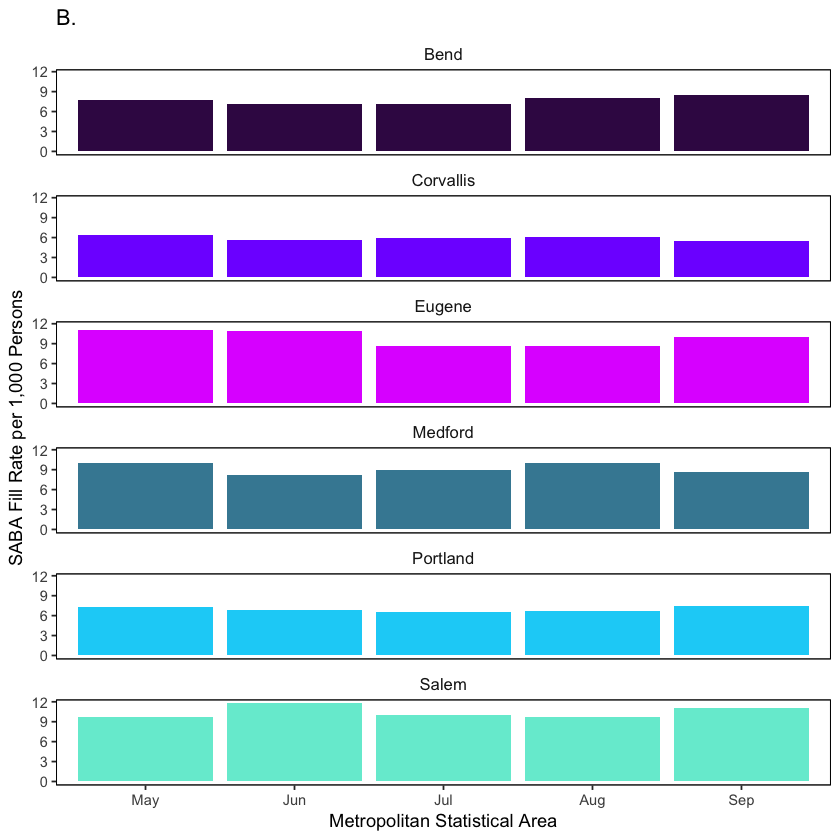

In [38]:
# print saba plot
saba_rate_plot

These bar charts are okay. The points do not look that much better. If I could do this over, I'd make MSA time-series by week instead of month. That would require a whole new set of analyses.

In [12]:
summary(ed_count)

      MSA            month        n_ed           NAME          
 Min.   :13460   Min.   :5   Min.   :  9.0   Length:30         
 1st Qu.:18700   1st Qu.:6   1st Qu.: 68.5   Class :character  
 Median :27220   Median :7   Median :142.5   Mode  :character  
 Mean   :27820   Mean   :7   Mean   :239.2                     
 3rd Qu.:38900   3rd Qu.:8   3rd Qu.:255.0                     
 Max.   :41420   Max.   :9   Max.   :861.0                     
 POPESTIMATE2013        rate          rate_per10k      msa_name        
 Min.   :  85934   Min.   :0.01047   Min.   :1.047   Length:30         
 1st Qu.: 165270   1st Qu.:0.02978   1st Qu.:2.978   Class :character  
 Median : 281098   Median :0.04583   Median :4.583   Mode  :character  
 Mean   : 586775   Mean   :0.04518   Mean   :4.518                     
 3rd Qu.: 397963   3rd Qu.:0.06452   3rd Qu.:6.452                     
 Max.   :2309289   Max.   :0.08895   Max.   :8.895                     
 month_name
 May:6     
 Jun:6     
 Jul:6     


In [39]:
ed_rate_plot = ggplot(ed_count, aes(x = month_name, 
                                        group = msa_name, fill = msa_name)) +
    geom_bar(aes(weight = rate_per10k), show.legend = F) +
    scale_fill_manual("Metro Area", values = c("#3c1053", "#7f00ff", "#e100ff", 
                                             "#4389a2", "#0ed2f7", "#74ebd5")) +
    facet_wrap(~msa_name, ncol = 1) +
    ylab("Emergency Department Admissions per 10,000 Persons") +
    xlab("Metropolitan Statistical Area") +
    ggtitle('C.') +
    theme(panel.background = element_rect(fill = 'white', colour = 'black'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        # strip element
        strip.background = element_rect(colour=NA, fill=NA),
        panel.border = element_rect(fill = NA, color = "black"),
        # facet text size
        strip.text = element_text(size = 10),
        axis.title.y = element_text(angle = 90))

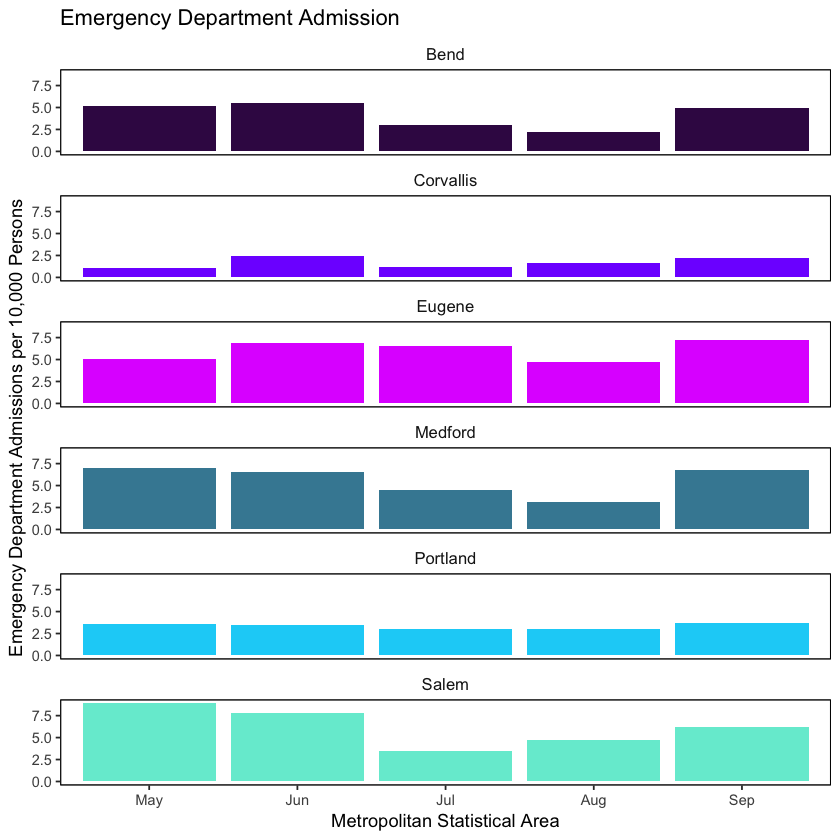

In [30]:
# print ed rate plot
ed_rate_plot

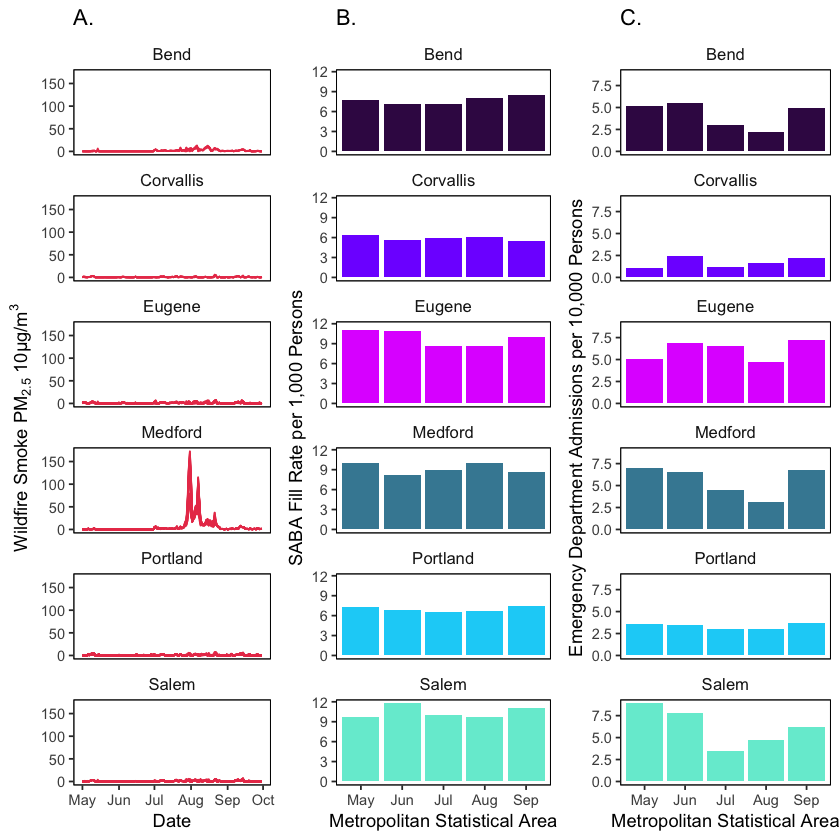

In [43]:
gridExtra::grid.arrange(pm_msa_plot, saba_rate_plot, ed_rate_plot, ncol=3)

Saving plot for manuscript.

In [48]:
tiff('Figs/msa_smoke_rate.tiff', width = 800, height = 800)
gridExtra::grid.arrange(pm_msa_plot, saba_rate_plot, ed_rate_plot, ncol=3)
dev.off()

pdf 
  2